In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import tensorflow.python.keras.backend as K

In [9]:
IMAGE_SIZE = 64
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS = 30

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [11]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

2580

The length of the dataset is 645 because every element in it is a batch of 32
images. 

$645 \cdot 32 = 20640$ images

But there are 20638 images in the dataset, meaning that the last batch is 
incomplete.

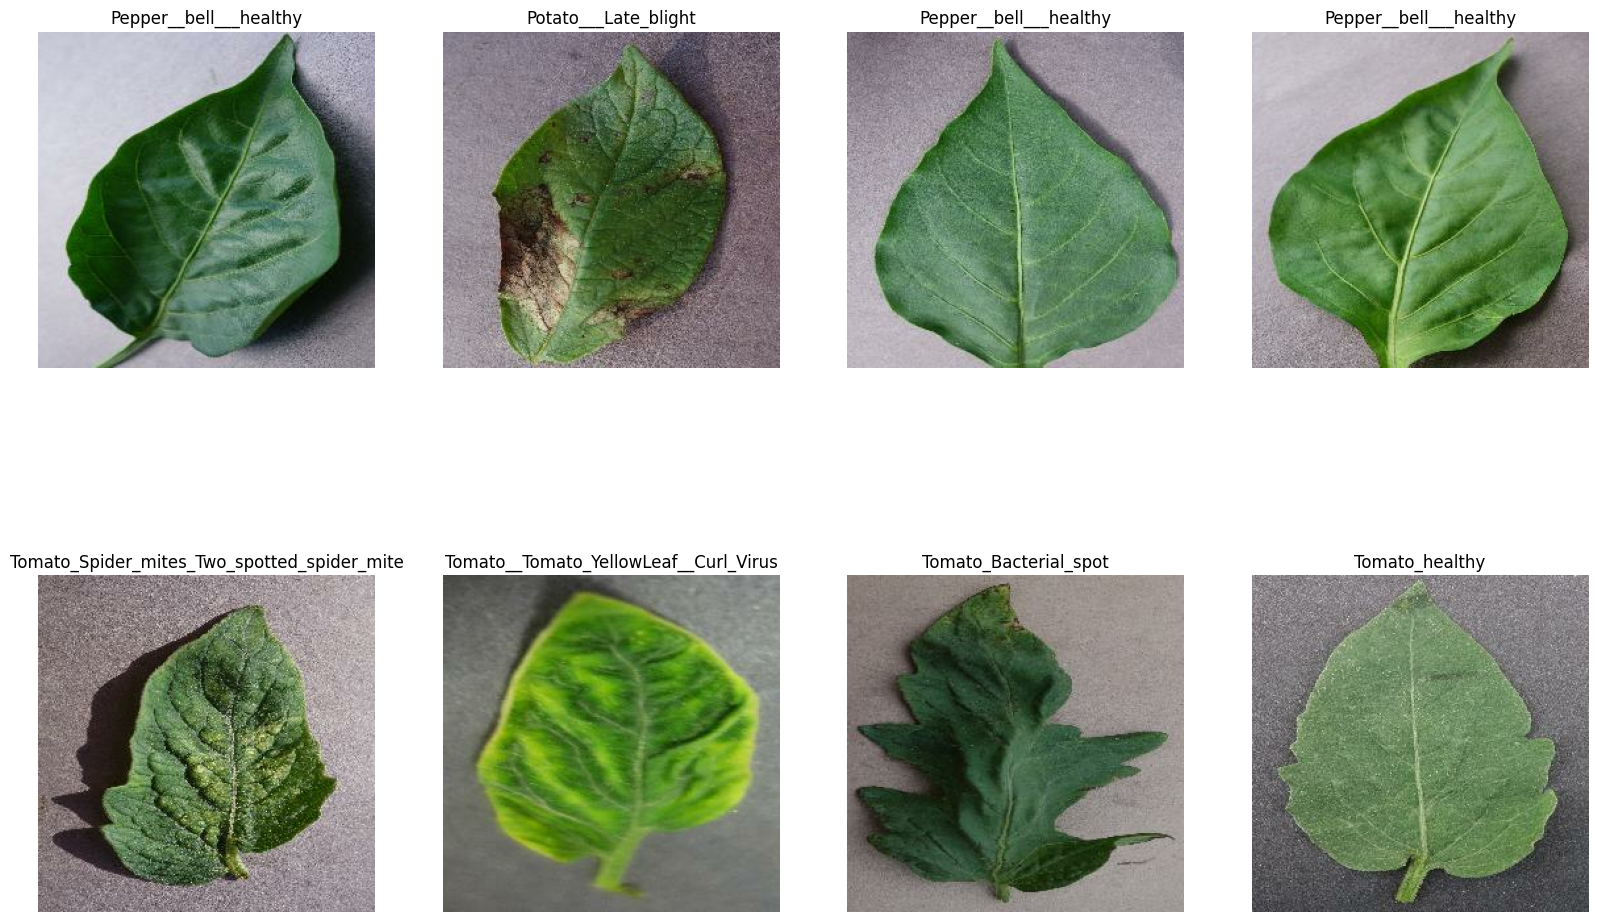

In [60]:
plt.figure(figsize=(20, 20))
for image_batch, label_batch in dataset.take(1):
    # print(image_batch.shape, label_batch.shape)
    for i in range (8):
        ax = plt.subplot(3, 4, i + 1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
train_size = 0.70
len(dataset)*train_size

1805.9999999999998

In [10]:
train_ds = dataset.take(1805)

In [11]:
len(train_ds)

1805

In [12]:
test_ds = dataset.skip(1805)
len(test_ds)

775

In [13]:
val_size = 0.15
len(dataset)*val_size

387.0

In [14]:
val_ds = test_ds.take(387)
len(val_ds)

387

In [15]:
test_ds = test_ds.skip(387)
len(test_ds)

388

In [14]:
def get_tf_dataset_splits(ds, train_split = 0.7, val_split = 0.15, 
                          shuffle = True, 
                          shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_tf_dataset_splits(dataset)

In [36]:
len(train_ds)

1805

In [37]:
len(val_ds)

387

In [38]:
len(test_ds)

388

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
len(class_names)

15

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

# model = models.Sequential([
#     layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     layers.Rescaling(1.0/255),
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.2),
#     layers.RandomContrast(0.2),

#     layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.3),

#     layers.Conv2D(64, (3,3), activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.3),

#     layers.Conv2D(128, (3,3), activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.3),

#     layers.GlobalAveragePooling2D(),
#     layers.Dense(128, activation="relu"),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
#     layers.Dense(n_classes, activation="softmax"),
# ])

model = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

c:\Users\Oceeta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (8, 64, 64, 3)         │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (8, 62, 62, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (8, 31, 31, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (8, 29, 29, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (8, 14, 14, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (8, 12, 12, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (8, 6, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (8, 2304)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 64)                │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 15)                │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,815 (800.06 KB)

 Trainable params: 204,815 (800.06 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# initial_learning_rate = 1e-3
# lr_schedule = ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=10000,
#     decay_rate=0.9,
#     staircase=True)

# model.compile(optimizer=Adam(learning_rate=lr_schedule),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('training.log', separator=',', append=False)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[csv_logger]
)

Epoch 1/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 69s 33ms/step - accuracy: 0.2967 - loss: 2.1517 - val_accuracy: 0.5963 - val_loss: 1.2119
Epoch 2/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.6191 - loss: 1.1621 - val_accuracy: 0.6922 - val_loss: 0.8925
Epoch 3/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.7068 - loss: 0.8651 - val_accuracy: 0.7028 - val_loss: 0.8463
Epoch 4/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.7558 - loss: 0.6963 - val_accuracy: 0.8007 - val_loss: 0.5641
Epoch 5/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.7958 - loss: 0.5936 - val_accuracy: 0.8375 - val_loss: 0.4630
Epoch 6/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.8190 - loss: 0.5329 - val_accuracy: 0.8314 - val_loss: 0.4855
Epoch 7/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.8258 - loss: 0.5106 - val_accuracy: 0.8401 - val_loss: 0.4492
Epoch 8/30
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.8475 -

- Train split = 70/15/15
- Shap XAI
- Graph the training *
- Save the model

Tried training for 10 epochs first.
Tried training for 20 epochs second.
Now, I'll try training for 15 epochs.

In [28]:
model.evaluate(test_ds)

388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9379 - loss: 0.1742


[0.1789751797914505, 0.9387491941452026]

In [29]:
#model_version = 2
#model.save(f"../models/{model_version}.keras")

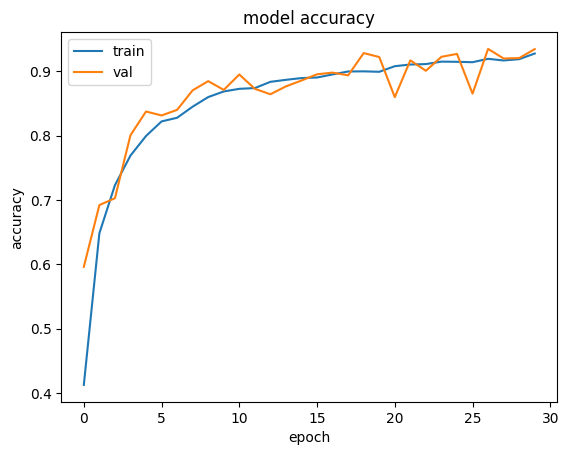

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

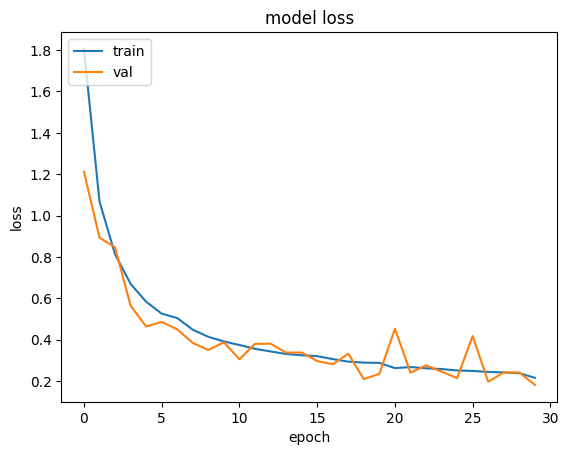

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

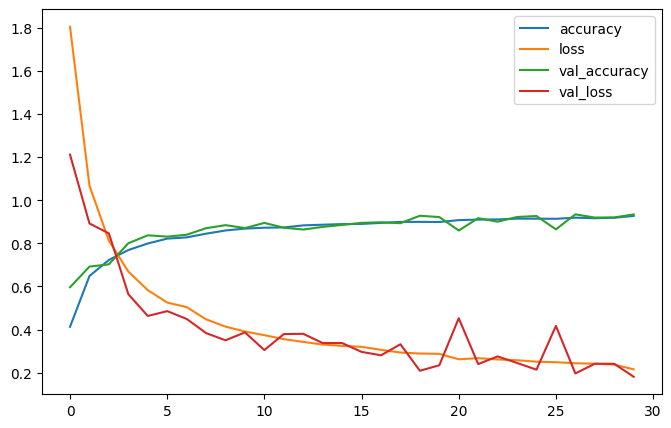

In [32]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [33]:
import shap
import numpy as np

/home/osita/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
for d in train_ds:
    X, y = d[0].numpy(), d[1].numpy()
    break

In [49]:
# def map2layer(X, layer):
#     feed_dict = dict(zip([model.layers[0].input], X))
#     return K.get_session().run(model.layers[layer].input, feed_dict)

In [50]:
# to_explain= X[[1,2]]

# layer = 9
# explainer = shap.GradientExplainer((model.layers[layer].input, model.layers[-1].output),
#                                    map2layer(X.copy(), layer),)

# shap_values, indexes = explainer.shap_values(map2layer(to_explain, layer), ranked_outputs=2)

# index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# shap.image_plot(shap_values, index_names, index_names)

In [51]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [52]:
print(X.shape,y.shape)

(8, 64, 64, 3) (8,)


In [53]:
def f(X):
    tmp = X.copy()
    return model(tmp)

In [54]:
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

In [55]:
explainer = shap.Explainer(f, masker, output_names=class_names)

In [56]:
shap_value = explainer(X, max_evals=5000, batch_size=500, outputs=shap.Explanation.argsort.flip[:3])


PartitionExplainer explainer: 9it [03:05, 23.21s/it]                       


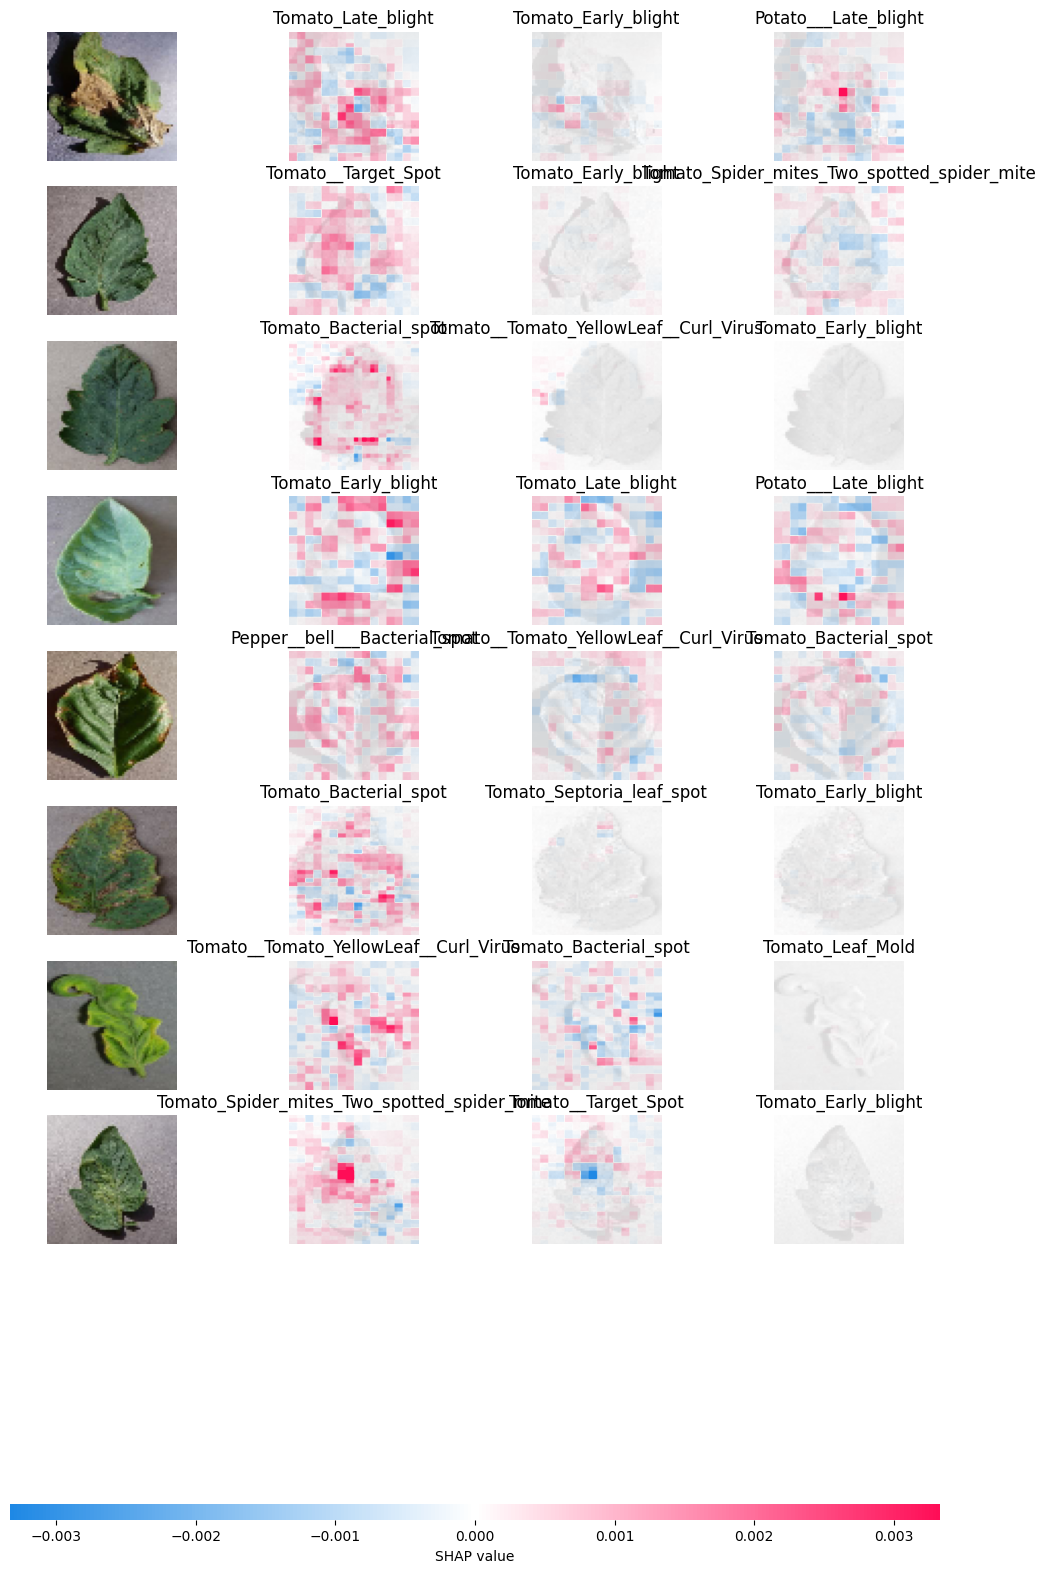

In [57]:
shap.image_plot(shap_value, X/255)

In [44]:
shap_value.shape

(8, 64, 64, 3, 3)

# Confusion Matrix for Model_V2

In [20]:
model = tf.keras.models.load_model("../models/2.keras")

In [43]:
# Get predictions
import numpy as np

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)  # Convert probabilities to class indices


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [53]:
import numpy as np

X_test_list = []
y_test_list = []

for d in test_ds:
    X_test_list.append(d[0].numpy())  # Images
    y_test_list.append(d[1].numpy())  # Labels

# Concatenate all batches into a single array
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)


In [54]:
len(X_test)

3104

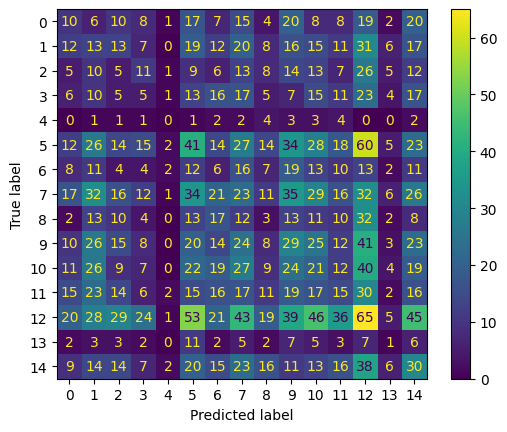

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test contains true class indices
conf_matrix = confusion_matrix(y_test, y_pred)

# Optional: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="viridis")  # Change colormap as desired


In [48]:
print(f"Train size: {len(list(train_ds))}")
print(f"Validation size: {len(list(val_ds))}")
print(f"Test size: {len(list(test_ds))}")


Train size: 1805
Validation size: 387
Test size: 388


In [55]:
X_test.shape

(3104, 64, 64, 3)

In [56]:
y_test.shape

(3104,)

# MobileNetV2 Test

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load the MobileNetV2 base model (pretrained on ImageNet)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Freeze the base model layers
base_model.trainable = False


C:\Users\Oceeta\AppData\Local\Temp\ipykernel_31364\1202952378.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


In [11]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Regularization
    layers.Dense(15, activation='softmax')  # Output layer
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5,  # Keep epochs low for time constraints
                    verbose=1)

Epoch 1/5
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 117s 58ms/step - accuracy: 0.3438 - loss: 2.0470 - val_accuracy: 0.5568 - val_loss: 1.3061
Epoch 2/5
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 95s 52ms/step - accuracy: 0.5038 - loss: 1.4958 - val_accuracy: 0.5901 - val_loss: 1.2277
Epoch 3/5
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 92s 51ms/step - accuracy: 0.5403 - loss: 1.3761 - val_accuracy: 0.6056 - val_loss: 1.1580
Epoch 4/5
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 91s 50ms/step - accuracy: 0.5512 - loss: 1.3239 - val_accuracy: 0.6163 - val_loss: 1.1264
Epoch 5/5
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 102s 57ms/step - accuracy: 0.5710 - loss: 1.2605 - val_accuracy: 0.6379 - val_loss: 1.0527


In [17]:
model.evaluate(test_ds)

  4/388 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.7500 - loss: 1.0924

388/388 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6247 - loss: 1.1467


c:\Users\Oceeta\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


[1.1317334175109863, 0.6246770024299622]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━

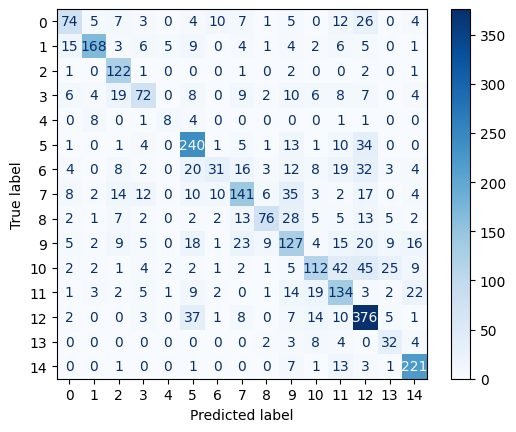

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")  # Change colormap as desired


In [25]:
len(y_true)

3096

In [12]:
model_2 = tf.keras.models.load_model("../models/2.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

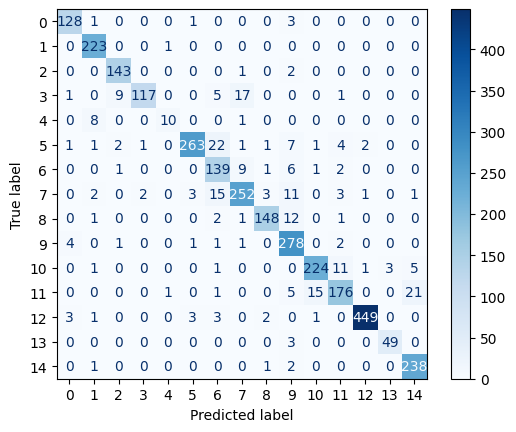

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model_2.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")  # Change colormap as desired

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       133
           1       0.93      1.00      0.96       224
           2       0.92      0.98      0.95       146
           3       0.97      0.78      0.87       150
           4       0.83      0.53      0.65        19
           5       0.97      0.86      0.91       306
           6       0.74      0.87      0.80       159
           7       0.89      0.86      0.88       293
           8       0.95      0.90      0.92       165
           9       0.84      0.97      0.90       288
          10       0.93      0.91      0.92       246
          11       0.88      0.80      0.84       219
          12       0.99      0.97      0.98       462
          13       0.94      0.94      0.94        52
          14       0.90      0.98      0.94       242

    accuracy                           0.91      3104
   macro avg       0.91      0.89      0.89      3104
weighted avg       0.92   

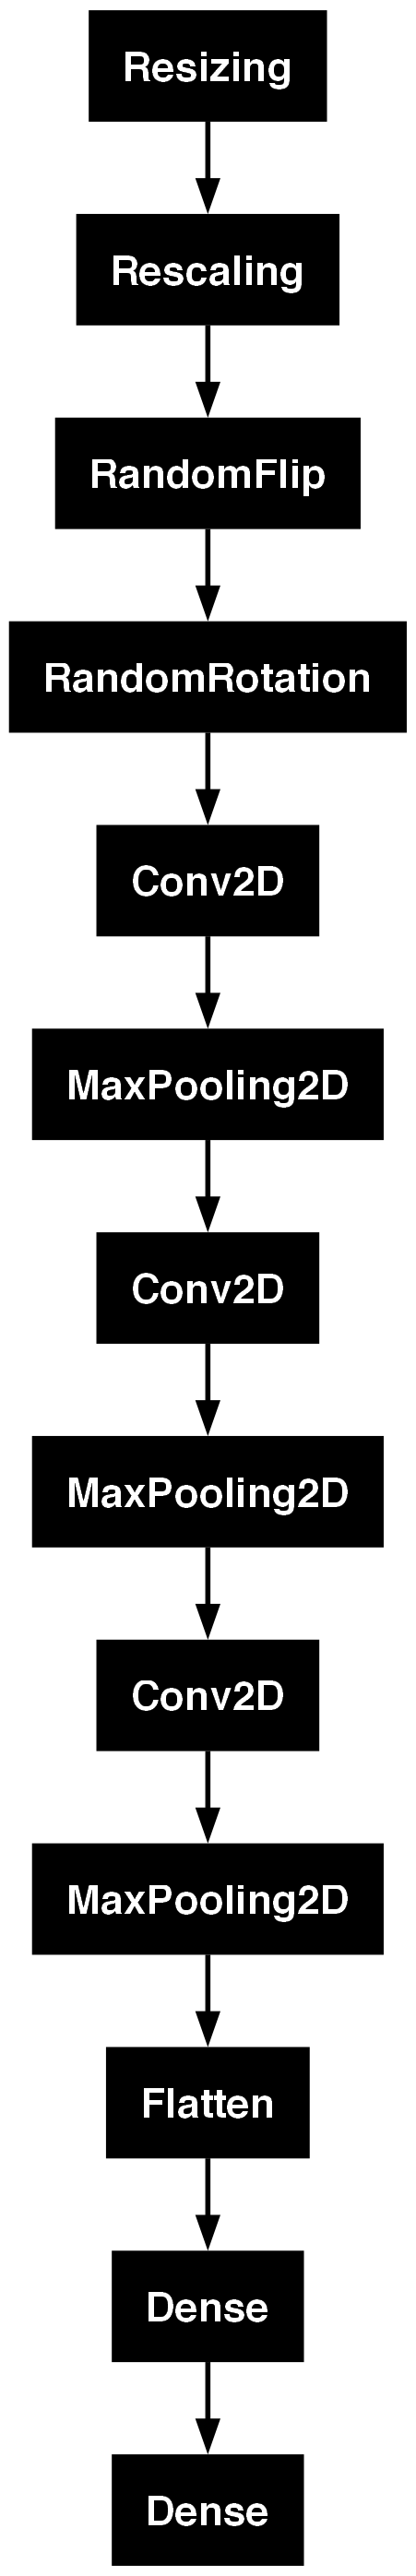

In [6]:
from keras.utils import plot_model

plot_model(model_2)

In [42]:
#model_version = 3
#model.save(f"../models/{model_version}.keras")